## Load MNIST on Python 3.x

In [5]:
import pickle
import gzip
import keras
from keras.layers import Dense
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
from keras.models import Sequential
from PIL import Image
import os
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from pylab import *
from sklearn.metrics import confusion_matrix
import itertools
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.utils import np_utils
from keras import backend as K

In [6]:
filename = 'D:\sem1\intro to ml\project3\mnist.pkl.gz'
f = gzip.open(filename, 'rb')
training_data, validation_data, test_data = pickle.load(f, encoding='latin1')
#print(len(training_data))
#print(training_data[1])
x_train= training_data[0]
y_train = training_data[1]
x=training_data[0]
y=training_data[1]
x_test = test_data[0]
y_test = test_data[1]
val_x = validation_data[0]
val_y = validation_data[1]
x_train,y_train = training_data
x_test,y_test = test_data

f.close()


## Load USPS on Python 3.x

In [7]:
USPSMat  = []
USPSTar  = []
curPath  = r'D:\sem1\intro to ml\project3\USPSdata\USPSdata\Numerals'
savedImg = []

for j in range(0,10):
    curFolderPath = curPath + '/' + str(j)
    imgs =  os.listdir(curFolderPath)
    for img in imgs:
        curImg = curFolderPath + '/' + img
        if curImg[-3:] == 'png':
            img = Image.open(curImg,'r')
            img = img.resize((28, 28))
            savedImg = img
            imgdata = (255-np.array(img.getdata()))/255
            USPSMat.append(imgdata)
            USPSTar.append(j)
testx= USPSMat
testy = USPSTar
testxnn= np.asarray(USPSMat)
num_classes = 10
USPSTarnn = keras.utils.to_categorical(USPSTar, num_classes)
testynn = USPSTarnn
print(len(testx ) )
#print(len(testy))

19999


In [31]:
learning_rate = 0.01
def log_reg(train_features, target, steps):
    wm = []
    mat = np.zeros((10))
    y = np.zeros((10))

    for i in range(10):
        dim1 = np.zeros(train_features.shape[1])
        wm.append(dim1)
        
    for step in range(steps):
        x_row = train_features[step]
        tar_row = target[step]
        total = 0
        for i in range(10):
            b= 0.01
            mat[i] = np.dot(wm[i].T, x_row) + b
            total = total + np.exp(mat[i])
        for i in range(10):
            y[i] = (np.exp(mat[i])) / (total)
        for i in range(10):
            gradient = (y[i] - tar_row[i]) * x_row
            wm[i] = wm[i] - (learning_rate * gradient)

    return wm

def oneHot(tar):
    m = tar.shape[0]
    targets = np.array(tar)
    OH = scipy.sparse.csr_matrix((np.ones(m), (tar, np.array(range(m)))))
    OH = np.array(OH.todense()).T
    #OH = np.zeros((m,10))
    #OH[(np.arange(m),target)] =1
    return OH

def prediction(train_features, target, steps, wx):
    wm = wx
    a_mat = np.zeros((10))
    yy = np.zeros(steps)
    for i in range(10):
        dim1 = np.zeros(train_features.shape[1])
        wm.append(dim1)
        
    for step in range(steps):
        x_row = train_features[step]
        tar_row = target[step]
        total = 0
        for i in range(10):
            bias_value = 0
            a_mat[i] = np.dot(wm[i].T, x_row) + bias_value
            total = total + np.exp(a_mat[i])
        y = np.zeros((10))

        for i in range(10):
            y[i] = (np.exp(a_mat[i])) / (total)
        
        yy[step] = (np.argmax(y)).astype(int)
    return yy

def predictionUSPS(train_features, target, steps, wx):
    weight_matrix = wx
    a_mat = np.zeros((10))
    yy = np.zeros(steps)
    for i in range(10):
        dim1 = np.zeros(len(train_features))
        weight_matrix.append(dim1)
        
    for step in range(steps):
        x_row = train_features[step]
        tar_row = target[step]
        total = 0
        for i in range(10):
            bias_value = 0
            a_mat[i] = np.dot(weight_matrix[i].T, x_row) + bias_value
            total = total + np.exp(a_mat[i])
        y = np.zeros((10))

        for i in range(10):
            y[i] = (np.exp(a_mat[i])) / (total)
        #print("Ypreds")
        #print(np.argmax(y))
        #print(tar_row)
        
        yy[step] = (np.argmax(y)).astype(int)
    return yy

In [10]:
def plot_matrix(pre, classes,normalize=False, title='Confusion matrix', cmap=plt.cm.Blues):

    plt.imshow(pre, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if(normalize):
        pre = pre.astype('float') / pre.sum(axis=1)[:, np.newaxis]
        print("with Normalization")
    else:
        print("without normalization")

    threshold = pre.max() / 2.
    for i, j in itertools.product(range(pre.shape[0]), range(pre.shape[1])):
        plt.text(j, i, pre[i, j],
                 horizontalalignment="center",
                 color="white" if pre[i, j] > threshold else "black")

    plt.tight_layout()
    plt.ylabel('True value')
    plt.xlabel('Predicted value')

In [33]:
#w = np.zeros([x.shape[1],len(np.unique(y))])
train_logx = x_train
target = oneHot(y_train)
steps = 10000
steps_train = 50000
def getacc(mas,tar):
    acc = 0
    for i in range(0,len(mas)):
        if(int(mas[i]) == tar[i]):
            acc = acc + 1
    return (acc / 10000)       

wx = log_reg(train_logx, target, steps_train)
ma = prediction(x_test,y_test,steps, wx)
ma_val = prediction(val_x,val_y,steps, wx)
#ma_usps = prediction(testx,testy,steps,wx)
xx_mnist = []
xx_val = []
tar = y_test
tar_val = val_y
#tar_usps = testy
#print(tar)
for ele in ma:
    xx_mnist.append(int(ele))
for ele in ma_val:
    xx_val.append(int(ele))   
#print(xx_val)
#print(xx)    
print("MNIST Accuracy :" , getacc(xx_mnist,tar))
#print("Validation Accuracy :", get(xx_val,tar_val))
#print("USPS Accuracy :", getacc(ms_usps,tar_usps))
 


MNIST Accuracy : 0.907


without normalization


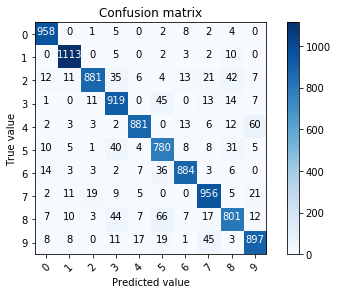

In [34]:
out_mnist = confusion_matrix(y_test, ma)
#print("confusion matrix :" , out_mnist)
plot_matrix(out_mnist, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [35]:
#w = np.zeros([x.shape[1],len(np.unique(y))])
train_features = x_train
target = oneHot(y_train)
steps = 19999
def getacc(ma,tar):
    acc = 0
    for i in range(0,len(ma)):
        if(int(ma[i]) == tar[i]):
            acc = acc + 1
    return (acc / 19999)
wx = log_reg(train_features, target, steps)
#ma = prediction(x_test,y_test,steps, wx)
ma_usps = predictionUSPS(USPSMat,testy,steps,wx)
xx_usps = []
tar_usps = testy
#print(tar)
for ele in ma_usps:
    xx_usps.append(ele)
print("USPS Accuracy :", getacc(ma_usps,tar_usps))


USPS Accuracy : 0.34906745337266865


without normalization


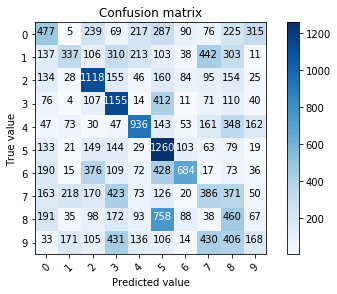

In [36]:
out_usps = confusion_matrix(testy, ma_usps)
#print("confusion matrix " , out_usps)
plot_matrix(out_usps, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# Neural network

In [17]:


num_classes=10
image_vector_size=28*28
x_trainn = x_train.reshape(x_train.shape[0], image_vector_size)
x_testn = x_test.reshape(x_test.shape[0], image_vector_size)
val_xn = val_x.reshape(val_x.shape[0], image_vector_size)
val_yn = keras.utils.to_categorical(val_y, num_classes)
y_trainn = keras.utils.to_categorical(y_train, num_classes)
y_testn = keras.utils.to_categorical(y_test, num_classes)
image_size = 784
USPSTa = USPSTar
USPSTar = keras.utils.to_categorical(USPSTar, num_classes)
model = Sequential()
model.add(Dense(units=100, activation='relu', input_shape=(image_size,)))
model.add(Dense(units=128, activation='relu',input_shape=(image_size,)))
model.add(Dense(units=num_classes, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy',metrics=['accuracy'])
history = model.fit(x_trainn, y_trainn, batch_size=6000, epochs=30,verbose=False,validation_split=.1)
loss1,accuracy1 = model.evaluate(testxnn,testynn,verbose=False)
#print("MNIST: "  ,loss)
print("USPS Acc: " ,accuracy1)  



USPS Acc:  0.34846742336967834


In [18]:
tar_nn_us = np.asarray(USPSTar)
pnn_usps = model.predict_classes(testxnn)
pnn_us = model.predict(testxnn)
#nn_out_usps = confusion_matrix(tar_nn_us, pnn_usps)
print("Neural Network confusion matrix USPS: " )
#plot_matrix(nn_out_usps, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

Neural Network confusion matrix USPS: 


MNIST ACC:  0.9633
MNIST Val:  0.9648
Neural network confusion matrix MNIST: 
without normalization


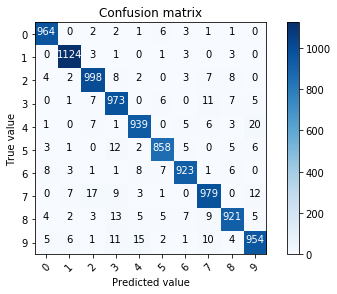

In [19]:
loss,accuracy = model.evaluate(x_testn, y_testn, verbose=False)
loss,accuracy_val = model.evaluate(val_xn, val_yn, verbose=False)
pnn_mnist = model.predict_classes(x_testn)
#pnn_mnist = pnn_mnist_x
print("MNIST ACC: " ,accuracy)
print("MNIST Val: " ,accuracy_val)
nn_out_mnist = confusion_matrix(y_test, pnn_mnist)
print("Neural network confusion matrix MNIST: " )
plot_matrix(nn_out_mnist, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [10]:

K.set_image_dim_ordering('th')
X_train, Y_train = training_data
X_test, Y_test = test_data
# reshape to be [samples][pixels][width][height]
X_train = X_train.reshape(X_train.shape[0], 1, 28, 28).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 1, 28, 28).astype('float32')

#testy = USPSTar
###########################
testxcnn= np.asarray(USPSMat)
num_classes = 10
#USPSTarcnn = keras.utils.to_categorical(USPSTar, num_classes)
USPSTarcnn = USPSTar
testycnn = USPSTarcnn

testxcnn = testxcnn.reshape(testxcnn.shape[0], 1, 28, 28).astype('float32')
#testycnn = X_test.reshape(testycnn.shape[0], 1, 28, 28).astype('float32')

testxcnn = testxcnn / 255
# one hot encode outputs
testycnn = np_utils.to_categorical(testycnn)
####################

# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)
num_classes = Y_test.shape[1]

def cnn_model():
    # create model
    model = Sequential()
    model.add(Conv2D(32, (5, 5), input_shape=(1, 28, 28), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(15, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.2))
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dense(num_classes, activation='softmax'))# Compile model
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

In [20]:
# build the model
model = cnn_model()
# Fit the model
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=200, verbose=2)
# Final evaluation of the model
scores_mnist = model.evaluate(X_test, Y_test, verbose=0)
pcnn_mnist = model.predict(X_test)
#score_usps = model.evaluate(testxcnn,testycnn, verbose=0)
#pcnn_usps = model.predict(testxcnn)
#print("CNN Error: %.2f%%" % (100-scores[1]*100))

Train on 50000 samples, validate on 10000 samples
Epoch 1/20
 - 2s - loss: 1.4744 - acc: 0.5063 - val_loss: 0.5464 - val_acc: 0.8358
Epoch 2/20
 - 2s - loss: 0.5443 - acc: 0.8287 - val_loss: 0.3675 - val_acc: 0.8882
Epoch 3/20
 - 2s - loss: 0.4106 - acc: 0.8725 - val_loss: 0.2801 - val_acc: 0.9170
Epoch 4/20
 - 2s - loss: 0.3207 - acc: 0.9016 - val_loss: 0.2159 - val_acc: 0.9378
Epoch 5/20
 - 2s - loss: 0.2600 - acc: 0.9199 - val_loss: 0.1752 - val_acc: 0.9479
Epoch 6/20
 - 2s - loss: 0.2171 - acc: 0.9328 - val_loss: 0.1408 - val_acc: 0.9590
Epoch 7/20
 - 2s - loss: 0.1885 - acc: 0.9414 - val_loss: 0.1226 - val_acc: 0.9631
Epoch 8/20
 - 2s - loss: 0.1642 - acc: 0.9501 - val_loss: 0.1062 - val_acc: 0.9680
Epoch 9/20
 - 2s - loss: 0.1488 - acc: 0.9534 - val_loss: 0.0960 - val_acc: 0.9705
Epoch 10/20
 - 2s - loss: 0.1346 - acc: 0.9579 - val_loss: 0.0870 - val_acc: 0.9738
Epoch 11/20
 - 2s - loss: 0.1260 - acc: 0.9611 - val_loss: 0.0770 - val_acc: 0.9744
Epoch 12/20
 - 2s - loss: 0.1126 - 

In [21]:
print(scores_mnist[len(scores_mnist)-3])
#print(score_usps[len(score_usps)-3])


0.984


CNN matrix MNIST: 
without normalization


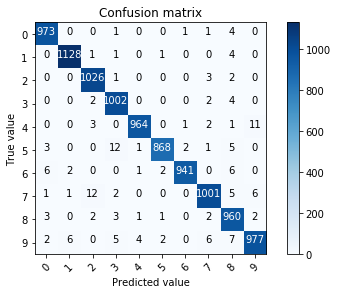

In [81]:
pcnn_class = model.predict_classes(X_test)
cnn_out_mnist = confusion_matrix(y_test, pcnn_class)
print("CNN matrix MNIST: " )
plot_matrix(cnn_out_mnist, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

# SVM and Random Forest

0.3406170308515426
RF confusion matrix USPS: 
without normalization


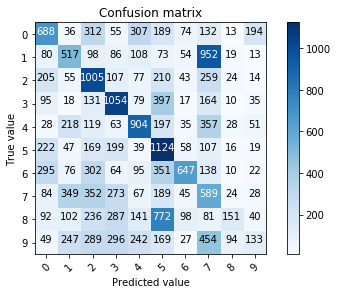

In [82]:
# SVM & RandomForest
n_train = 10000
n_test = 1000
indices = arange(len(x_train))
train_idx = arange(0,n_train)
test_idx = arange(n_train+1,n_train+n_test)
#X_train, y_train = mnist.data[train_idx], mnist.target[train_idx]
#X_test, y_test = mnist.data[test_idx], mnist.target[test_idx]
classifier2 = RandomForestClassifier(n_estimators=20)
classifier2.fit(x_train, y_train)
rf_preds_mnist = classifier2.predict(x_test)
rf_preds_usps = classifier2.predict(testx)
#print((preds == y_train).mean())

acc_rf = accuracy_score(testy, rf_preds_usps)
print(acc_rf)
# SVM
rf_out_usps = confusion_matrix(testy, rf_preds_usps)
print("RF confusion matrix USPS: " )
plot_matrix(rf_out_usps, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

RF confusion matrix MNIST: 
without normalization
Accuracy of MNSIT :  0.9577


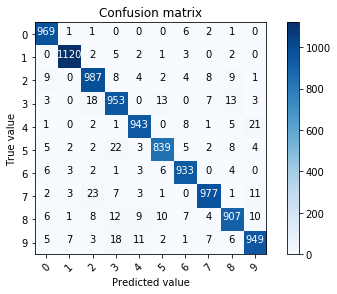

In [83]:
acc_rf_mnist =  accuracy_score(y_test, rf_preds_mnist)
rf_out_mnist = confusion_matrix(y_test, rf_preds_mnist)
print("RF confusion matrix MNIST: " )
plot_matrix(rf_out_mnist, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])
print("Accuracy of MNSIT : ",acc_rf_mnist)
#print(len(rf_preds_mnist) )

In [ ]:
classifier1 = SVC(kernel='rbf',gamma = 0.05)
classifier1.fit(x_train, y_train)
#print((testx.shape()))
sv_preds1_mnist = classifier1.predict(x_test)
sv_preds1_usps = classifier1.predict(testx)
print((sv_preds1_mnist == y_test).mean())
print((sv_preds1_usps == testy).mean())

print("SVM done")

In [8]:
sv_preds1_usps = classifier1.predict(testx)
print((sv_preds1_usps == testy).mean())

0.25866293314665734


RF confusion matrix MNIST: 
without normalization


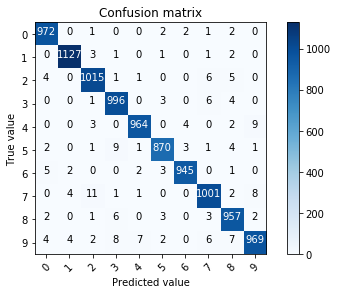

In [11]:
sv_out_mnist = confusion_matrix(y_test, sv_preds1_mnist)
print("RF confusion matrix MNIST: " )
plot_matrix(sv_out_mnist, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

RF confusion matrix USPS: 
without normalization


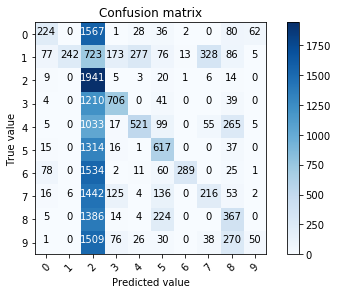

In [12]:
sv_out_usps = confusion_matrix(testy, sv_preds1_usps)
print("RF confusion matrix USPS: " )
plot_matrix(sv_out_usps, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

without normalization


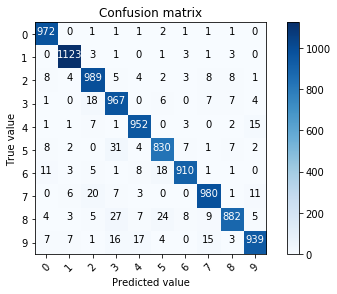

In [77]:
#### Ensemble
from scipy import stats
final_pred = np.array([])
for i in range(0,len(x_test)):
    final_pred = np.append(final_pred, stats.mode([xx_mnist[i],rf_preds_mnist[i],pnn_mnist[i],sv_preds1_mnist[i]])[0] )

final_mnist = confusion_matrix(y_test, final_pred)
plot_matrix(final_mnist, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

without normalization


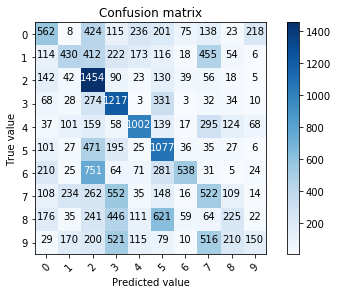

In [79]:

final_pred2 = np.array([])

for i in range(0,len(testx)):
    final_pred2 = np.append(final_pred2, stats.mode([xx_usps[i],rf_preds_usps[i],pnn_usps[i],sv_preds1_usps[i]])[0] )

final_usps = confusion_matrix(testy, final_pred2)
plot_matrix(final_usps, classes=[0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [74]:
finalacc1 = 0

for i in range(0,len(x_test)):
    if(int( int(final_pred[i]) ) == int(y_test[i]) ):
        finalacc1 = finalacc1 + 1
print("final acc mnist : " ,finalacc1 / 10000 )


final acc mnist :  0.9544


In [70]:
finalacc2 = 0
for i in range(0,len(testx)):
    if(int( int(final_pred2[i]) ) == int(testy[i]) ):
        finalacc2 = finalacc2 + 1
print("final acc USPS : " ,finalacc2 / 20000 )

final acc USPS :  0.35885
